https://www.datacamp.com/community/tutorials/xgboost-in-python

In [149]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/LatexPackage/miktex/bin/x64'

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
from sklearn.datasets import load_boston

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5]:
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

import pandas as pd
import urllib.request
     

from IPython.display import clear_output

In [6]:
boston = load_boston()

In [7]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [8]:
data['PRICE'] = boston.target

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [11]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) #reg:logistic for tree


In [14]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.170035


# Starting of analysis

### Get 1min XRP data

In [16]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [17]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [18]:
xrp_2018_full = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None)

In [19]:
xrp_2019_until_Oct = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None)

In [20]:
xrp_2018_full.columns = header_format

In [21]:
xrp_2019_until_Oct.columns = header_format

In [22]:
xrp_2018_onwards = pd.concat([xrp_2018_full, xrp_2019_until_Oct])

In [23]:
XRP_Data = xrp_2018_onwards[xrp_2018_onwards['timestamp_UTC_millisec'] >= 1534287600000]

In [24]:
XRP_Data['datetime_real'] = XRP_Data['timestamp_UTC_millisec'].apply(lambda x: datetime.utcfromtimestamp(x/1000))

In [25]:
len(XRP_Data)

564561

In [26]:
XRP_Data['datetime_real'].min()

Timestamp('2018-08-14 23:00:00')

In [27]:
XRP_Data['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [28]:
(XRP_Data['datetime_real'].max() - XRP_Data['datetime_real'].min())

Timedelta('443 days 16:59:00')

In [29]:
XRP_Data['checking_timestamp_UTC_millisec'] = XRP_Data['timestamp_UTC_millisec'].shift(-1)

In [30]:
XRP_Data['dif'] = XRP_Data['checking_timestamp_UTC_millisec'] - XRP_Data['timestamp_UTC_millisec']

In [31]:
XRP_Data_resample_1min_ffill = XRP_Data.set_index('datetime_real').resample('1T').ffill()

In [32]:
XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec'].shift(-1)

In [33]:
XRP_Data_resample_1min_ffill['dif'] = XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] - XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']

In [34]:
XRP_Data_resample_1min_ffill['timestamp_UTC'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']/1000

In [35]:
XRP_Data_resample_1min_ffill.head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2018-08-14 23:00:00,1534287600000,0.26444,0.26427,0.26448,0.26427,21493.134691,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:01:00,1534287660000,0.26410,0.26408,0.26418,0.26408,6316.950507,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:02:00,1534287720000,0.26419,0.26429,0.26429,0.26390,15876.859198,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:03:00,1534287780000,0.26389,0.26359,0.26389,0.26359,15102.000000,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:04:00,1534287840000,0.26368,0.26359,0.26379,0.26359,6305.473357,1.534288e+12,60000.0,1.534288e+09


#### rough check on data

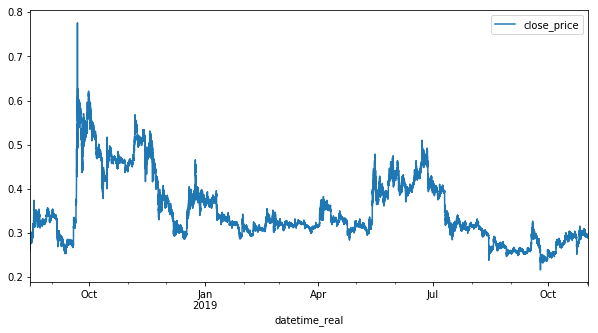

In [36]:
XRP_Data_resample_1min_ffill[['close_price']].plot(figsize = (10,5))

In [37]:
XRP_Data_resample_1min_ffill.tail(10)

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2019-11-01 15:50:00,1572623400000,0.29032,0.29029,0.29032,0.29029,18977.229740,1.572623e+12,60000.0,1.572623e+09
2019-11-01 15:51:00,1572623460000,0.29034,0.29030,0.29035,0.29030,11583.433064,1.572624e+12,60000.0,1.572623e+09
2019-11-01 15:52:00,1572623520000,0.29070,0.29046,0.29071,0.29046,205.000000,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:53:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,0.0,1.572624e+09
2019-11-01 15:54:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,120000.0,1.572624e+09
2019-11-01 15:55:00,1572623700000,0.29083,0.29173,0.29173,0.29083,1570.393827,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:56:00,1572623760000,0.29161,0.29150,0.29161,0.29120,4022.034331,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:57:00,1572623820000,0.29180,0.29154,0.29207,0.29154,6854.915950,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:58:00,1572623880000,0.29139,0.29030,0.29151,0.29030,8296.541362,1.572624e+12,60000.0,1.572624e+09



 selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush


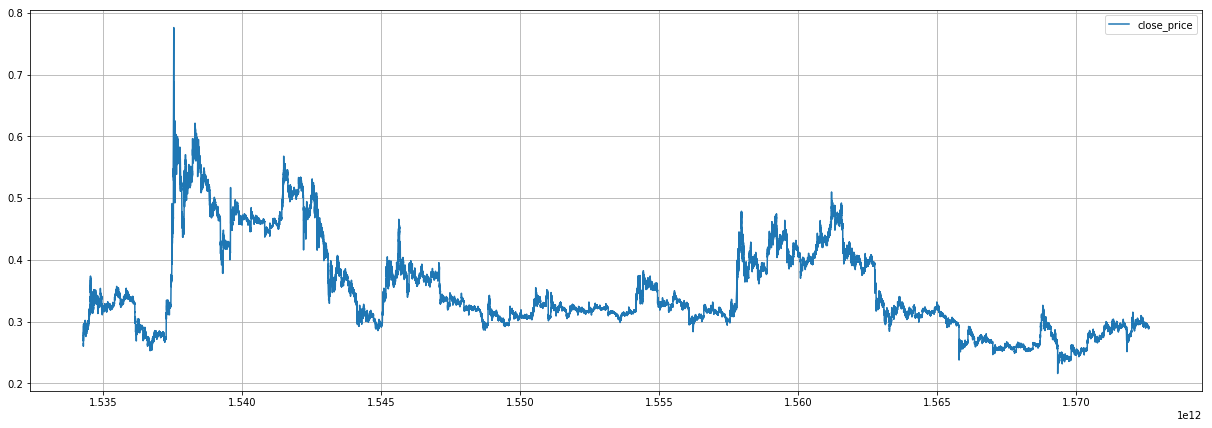

In [38]:
ploting_breakdown = XRP_Data_resample_1min_ffill.reset_index()

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close_price']

tran_x = ploting_breakdown['timestamp_UTC_millisec']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t



# plt.vlines(1534287600000, 0, 1, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()
print("\n selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush")

In [39]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
60,2018-08-15,1534291200000,0.27279,0.2734,0.27349,0.27279,17252.63782,1.534291e+12,60000.0,1.534291e+09


In [40]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
525660,2019-08-15,1565827200000,0.26373,0.26559,0.26559,0.26363,166192.961293,1.565827e+12,60000.0,1.565827e+09


## Saving Data 

In [41]:
# XRP_Data_backUp = XRP_Data_resample_1min_ffill.copy()

## Copy for testing

In [42]:
XRP_for_training =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1534287600) &
                           (XRP_Data_resample_1min_ffill['timestamp_UTC'] <1565823600)].reset_index().copy()

In [43]:
XRP_for_testing =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1565823600)].reset_index().copy()

In [44]:
XRP_for_testing.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
0,2019-08-14 23:00:00,1565823600000,0.27050,0.27034,0.27050,0.27032,200.000000,1.565824e+12,60000.0,1.565824e+09
1,2019-08-14 23:01:00,1565823660000,0.27034,0.27014,0.27034,0.27011,6970.610576,1.565824e+12,60000.0,1.565824e+09
2,2019-08-14 23:02:00,1565823720000,0.27015,0.27031,0.27044,0.27015,9002.533511,1.565824e+12,60000.0,1.565824e+09
3,2019-08-14 23:03:00,1565823780000,0.27028,0.27028,0.27034,0.27027,22726.951973,1.565824e+12,60000.0,1.565824e+09
4,2019-08-14 23:04:00,1565823840000,0.27015,0.26971,0.27015,0.26932,115833.923778,1.565824e+12,60000.0,1.565824e+09


In [45]:
XRP_for_testing['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [46]:
XRP_for_testing['datetime_real'].min()

Timestamp('2019-08-14 23:00:00')

## Analysis on training datasets

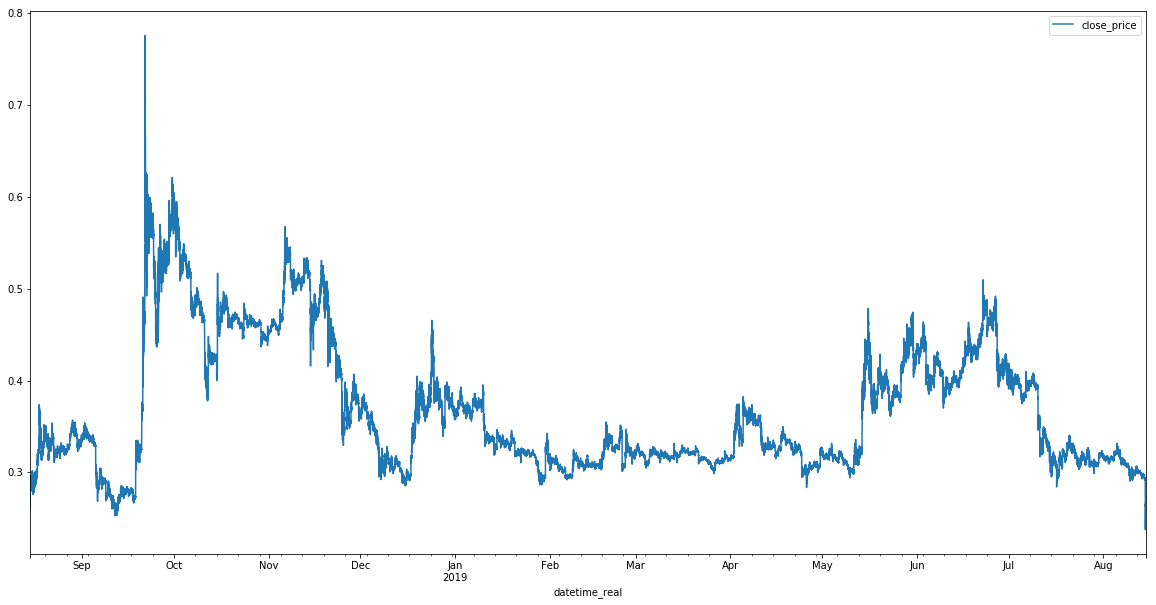

In [47]:
XRP_for_training.set_index('datetime_real')[['close_price']].plot(figsize = (20,10))

## Data mining, making own properties and features

In [48]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '3H': 180,
                    '4H': 240,
                    '5H': 300,
                    '6H': 360,
                    '7H': 420,
                    '8H': 480,
                    '9H': 540,
                    '10H': 600,
                    '11H': 660,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [49]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close_price'].rolling(v).mean()

In [50]:
compare_sequence = {}

In [51]:
for col_1 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [52]:
for k, val in compare_sequence.items():
    XRP_for_training[k] = (XRP_for_training[val[0]] - XRP_for_training[val[1]])/XRP_for_training[val[1]] 
#     print(k, val[0], val[1])

In [53]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close_price']-XRP_for_training[col])/XRP_for_training[col] 

In [54]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close_price'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_training['close_price'] - XRP_for_training['look_back_{}'.format(k)])/(v)
    XRP_for_training['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close_price'])/(v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


net_{net_percent}_percent is the net_percent + minimum for profit, 

i.e. net_01_percent = 0.1% + 0.003 = 0.004

In [55]:
net_01_percent = 0.004
net_02_percent = 0.007  # (for x percent, percent wrong needs to be taken into consideration)

In [56]:
Buy_in_decision = pd.DataFrame((XRP_for_training[['timestamp_UTC'] + [d for d in XRP_for_training.columns if '_forward_Percent_' in d]].set_index('timestamp_UTC') > net_02_percent).any(axis =1 )).rename(columns ={0: 'Buy_In'})

In [57]:
within_target_02_profit = XRP_for_training.merge(Buy_in_decision.reset_index(), on ='timestamp_UTC', how='left').dropna()

In [58]:
XRP_for_testing['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [59]:
within_target_02_profit['datetime_real'].min()

Timestamp('2018-08-24 23:00:00')

#### Selecting properties and becareful not to have any properties that look forward

In [60]:
[d for d in list(XRP_for_training.columns) if 'look_forward_' not in d]

['datetime_real',
 'timestamp_UTC_millisec',
 'open_price',
 'close_price',
 'highest_price',
 'lowest_price',
 'volume',
 'checking_timestamp_UTC_millisec',
 'dif',
 'timestamp_UTC',
 '3min_RA_on_Close',
 '4min_RA_on_Close',
 '5min_RA_on_Close',
 '10min_RA_on_Close',
 '15min_RA_on_Close',
 '20min_RA_on_Close',
 '25min_RA_on_Close',
 '30min_RA_on_Close',
 '35min_RA_on_Close',
 '40min_RA_on_Close',
 '45min_RA_on_Close',
 '50min_RA_on_Close',
 '55min_RA_on_Close',
 '1H_RA_on_Close',
 '2H_RA_on_Close',
 '3H_RA_on_Close',
 '4H_RA_on_Close',
 '5H_RA_on_Close',
 '6H_RA_on_Close',
 '7H_RA_on_Close',
 '8H_RA_on_Close',
 '9H_RA_on_Close',
 '10H_RA_on_Close',
 '11H_RA_on_Close',
 '12H_RA_on_Close',
 '24H_RA_on_Close',
 '2D_RA_on_Close',
 '3D_RA_on_Close',
 '4D_RA_on_Close',
 '5D_RA_on_Close',
 '10D_RA_on_Close',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_25min',
 '3min_minus_30min',
 '3min_minus_35min',
 '3min_minus_40min',

In [61]:
properties = [
#     'close',
#  'date',
#  'high',
#  'low',
#  'open',
#  'quoteVolume',
 'volume',
#  'weightedAverage',
#  'datetime_real',
 '3min_close_percent_dif',
 '4min_close_percent_dif',
 '5min_close_percent_dif',
 '10min_close_percent_dif',
 '15min_close_percent_dif',
 '20min_close_percent_dif',
 '1H_close_percent_dif',
 '2H_close_percent_dif',
 '4H_close_percent_dif',
 '12H_close_percent_dif',
 '24H_close_percent_dif',
 '2D_close_percent_dif',
 '3D_close_percent_dif',
 '4D_close_percent_dif',
 '5D_close_percent_dif',
 '10D_close_percent_dif',
 'calculate_look_back_Percent_3min',
 'calculate_look_back_Percent_4min',
 'calculate_look_back_Percent_5min',
 'calculate_look_back_Percent_10min',
 'calculate_look_back_Percent_15min',
 'calculate_look_back_Percent_20min',
 'calculate_look_back_Percent_1H',
 'calculate_look_back_Percent_2H',
 'calculate_look_back_Percent_4H',
 'calculate_look_back_Percent_12H',
 'calculate_look_back_Percent_24H',
 'calculate_look_back_Percent_2D',
 'calculate_look_back_Percent_3D',
 'calculate_look_back_Percent_4D',
 'calculate_look_back_Percent_5D',
 'calculate_look_back_Percent_10D',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_1H',
 '3min_minus_2H',
 '3min_minus_4H',
 '3min_minus_12H',
 '3min_minus_24H',
 '3min_minus_2D',
 '3min_minus_3D',
 '3min_minus_4D',
 '3min_minus_5D',
 '3min_minus_10D',
 '4min_minus_5min',
 '4min_minus_10min',
 '4min_minus_15min',
 '4min_minus_20min',
 '4min_minus_1H',
 '4min_minus_2H',
 '4min_minus_4H',
 '4min_minus_12H',
 '4min_minus_24H',
 '4min_minus_2D',
 '4min_minus_3D',
 '4min_minus_4D',
 '4min_minus_5D',
 '4min_minus_10D',
 '5min_minus_10min',
 '5min_minus_15min',
 '5min_minus_20min',
 '5min_minus_1H',
 '5min_minus_2H',
 '5min_minus_4H',
 '5min_minus_12H',
 '5min_minus_24H',
 '5min_minus_2D',
 '5min_minus_3D',
 '5min_minus_4D',
 '5min_minus_5D',
 '5min_minus_10D',
 '10min_minus_15min',
 '10min_minus_20min',
 '10min_minus_1H',
 '10min_minus_2H',
 '10min_minus_4H',
 '10min_minus_12H',
 '10min_minus_24H',
 '10min_minus_2D',
 '10min_minus_3D',
 '10min_minus_4D',
 '10min_minus_5D',
 '10min_minus_10D',
 '15min_minus_20min',
 '15min_minus_1H',
 '15min_minus_2H',
 '15min_minus_4H',
 '15min_minus_12H',
 '15min_minus_24H',
 '15min_minus_2D',
 '15min_minus_3D',
 '15min_minus_4D',
 '15min_minus_5D',
 '15min_minus_10D',
 '20min_minus_1H',
 '20min_minus_2H',
 '20min_minus_4H',
 '20min_minus_12H',
 '20min_minus_24H',
 '20min_minus_2D',
 '20min_minus_3D',
 '20min_minus_4D',
 '20min_minus_5D',
 '20min_minus_10D',
 '1H_minus_2H',
 '1H_minus_4H',
 '1H_minus_12H',
 '1H_minus_24H',
 '1H_minus_2D',
 '1H_minus_3D',
 '1H_minus_4D',
 '1H_minus_5D',
 '1H_minus_10D',
 '2H_minus_4H',
 '2H_minus_12H',
 '2H_minus_24H',
 '2H_minus_2D',
 '2H_minus_3D',
 '2H_minus_4D',
 '2H_minus_5D',
 '2H_minus_10D',
 '4H_minus_12H',
 '4H_minus_24H',
 '4H_minus_2D',
 '4H_minus_3D',
 '4H_minus_4D',
 '4H_minus_5D',
 '4H_minus_10D',
 '12H_minus_24H',
 '12H_minus_2D',
 '12H_minus_3D',
 '12H_minus_4D',
 '12H_minus_5D',
 '12H_minus_10D',
 '24H_minus_2D',
 '24H_minus_3D',
 '24H_minus_4D',
 '24H_minus_5D',
 '24H_minus_10D',
 '2D_minus_3D',
 '2D_minus_4D',
 '2D_minus_5D',
 '2D_minus_10D',
 '3D_minus_4D',
 '3D_minus_5D',
 '3D_minus_10D',
 '4D_minus_5D',
 '4D_minus_10D',
 '5D_minus_10D']

In [92]:
analysis_close_low = within_target_02_profit[within_target_02_profit['Buy_In']]

In [97]:
(100*(analysis_close_low['lowest_price'] - analysis_close_low['close_price'])/analysis_close_low['close_price']).describe()

count    338450.000000
mean         -0.058043
std           0.121330
min          -6.413953
25%          -0.065600
50%          -0.011265
75%           0.000000
max           0.000000
dtype: float64

## split into target and properties

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import pydot

In [64]:
from collections import Counter

In [65]:
import math

In [66]:
within_target_02_profit['datetime_real'].max()

Timestamp('2019-08-04 22:59:00')

In [67]:
target_y = within_target_02_profit[['Buy_In']].copy()

In [68]:
train_x = within_target_02_profit[properties].copy()

In [69]:
train_x.columns

Index(['volume', '3min_close_percent_dif', '4min_close_percent_dif',
       '5min_close_percent_dif', '10min_close_percent_dif',
       '15min_close_percent_dif', '20min_close_percent_dif',
       '1H_close_percent_dif', '2H_close_percent_dif', '4H_close_percent_dif',
       ...
       '2D_minus_3D', '2D_minus_4D', '2D_minus_5D', '2D_minus_10D',
       '3D_minus_4D', '3D_minus_5D', '3D_minus_10D', '4D_minus_5D',
       '4D_minus_10D', '5D_minus_10D'],
      dtype='object', length=153)

In [70]:
target_y.columns

Index(['Buy_In'], dtype='object')

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, test_size=0.33, random_state=324)

In [72]:
X_train_order = train_x.iloc[:-math.floor(len(train_x)*0.2)]

In [73]:
y_train_order = target_y.iloc[:-math.floor(len(target_y)*0.2)]

In [74]:
X_test_order = train_x.iloc[-math.floor(len(train_x)*0.2):]

In [75]:
y_test_order = target_y.iloc[-math.floor(len(target_y)*0.2):]

In [76]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [77]:
predictions = buy_in_decision_classifier.predict(X_test_order)

In [78]:
accuracy_score(y_true = y_test_order, y_pred = predictions)

0.5478073406421978

In [79]:
[2,3,4,5] + list(np.arange(10,200,10))

[2,
 3,
 4,
 5,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

In [71]:
for node in [2,3,4,5,6,8] + list(np.arange(10,200,10)):
    for state_rand in [0, 123 ,1995]:
        buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=node, random_state=state_rand)
        buy_in_decision_classifier.fit(X_train_order, y_train_order)

        predictions = buy_in_decision_classifier.predict(X_test_order)

        print('node' , node, 'accuracy', accuracy_score(y_true = y_test_order, y_pred = predictions) , 'sate' , state_rand) 

node 2 accuracy 0.6834781384062053 sate 0
node 2 accuracy 0.6834781384062053 sate 123
node 2 accuracy 0.6834781384062053 sate 1995
node 3 accuracy 0.5488202539324869 sate 0
node 3 accuracy 0.5488202539324869 sate 123
node 3 accuracy 0.5488202539324869 sate 1995
node 4 accuracy 0.5488202539324869 sate 0
node 4 accuracy 0.5488202539324869 sate 123
node 4 accuracy 0.5488202539324869 sate 1995
node 5 accuracy 0.5488202539324869 sate 0
node 5 accuracy 0.5488202539324869 sate 123
node 5 accuracy 0.5488202539324869 sate 1995
node 6 accuracy 0.5488202539324869 sate 0
node 6 accuracy 0.5488202539324869 sate 123
node 6 accuracy 0.5488202539324869 sate 1995
node 8 accuracy 0.5478073406421978 sate 0
node 8 accuracy 0.5478073406421978 sate 123
node 8 accuracy 0.5478073406421978 sate 1995
node 10 accuracy 0.5478073406421978 sate 0
node 10 accuracy 0.5478073406421978 sate 123
node 10 accuracy 0.5478073406421978 sate 1995
node 20 accuracy 0.5495460848463839 sate 0
node 20 accuracy 0.5495460848463839 s

In [72]:
#1

In [80]:
node = 8
state_rand = 0  #,1,42,235,1995]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=node, random_state=state_rand)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

predictions = buy_in_decision_classifier.predict(X_test_order)

print(accuracy_score(y_true = y_test_order, y_pred = predictions) , 'sate' , state_rand) 

0.5478073406421978 sate 0


In [81]:
Counter(predictions)

Counter({False: 118405, True: 66211})

In [89]:
Counter(y_test_order['Buy_In'])

Counter({False: 128757, True: 55859})

In [90]:
predictions

array([False, False, False, ..., False, False, False])

In [ ]:
dot_data = StringIO()
export_graphviz(buy_in_decision_classifier,
                feature_names=list(X_train_order.columns),
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [ ]:
graph.write_png("tree.png")


In [ ]:
Image(graph.create_png())

## Testing theory

In [ ]:
XRP_for_testing.head()

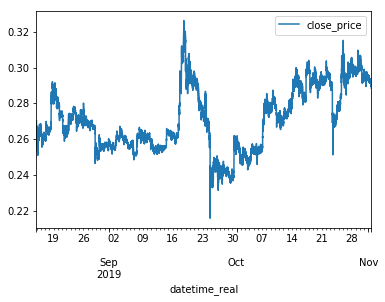

In [98]:
XRP_for_testing[['close_price','datetime_real']].set_index('datetime_real').plot()

In [99]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '4H': 240,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [100]:
for k,v in section_period.items():
    XRP_for_testing['{0}_RA_on_Close'.format(k)] = XRP_for_testing['close_price'].rolling(v).mean()

In [101]:
compare_sequence = {}

In [102]:
for col_1 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [103]:
for k, val in compare_sequence.items():
    XRP_for_testing[k] = (XRP_for_testing[val[0]] - XRP_for_testing[val[1]])/XRP_for_testing[val[1]] 
#     print(k, val[0], val[1])

In [104]:
for col in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    XRP_for_testing[col] = XRP_for_testing[col].shift(1)
    
    XRP_for_testing['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_testing['close_price']-XRP_for_testing[col])/XRP_for_testing[col] 

In [105]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['look_back_{}'.format(k)] = XRP_for_testing['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
#     XRP_for_testing['look_forward_{}'.format(k)] = XRP_for_testing['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_testing['close_price'] - XRP_for_testing['look_back_{}'.format(k)])/(5*v)
#     XRP_for_testing['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_testing['look_forward_{}'.format(k)] - XRP_for_testing['close'])/(5*v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


In [106]:
Counter(buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna()))

Counter({True: 33337, False: 65603})

In [107]:
XRP_for_testing_drop_na = XRP_for_testing.dropna()

In [108]:
len(XRP_for_testing_drop_na)

98939

In [109]:
len(XRP_for_testing.dropna())

98939

In [110]:
### Continus increases:

In [120]:
XRP_for_testing_drop_na.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003,True
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004,True
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003,True
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003,False
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003,False


In [112]:
XRP_for_testing_drop_na['Buy_from_decision_tree'] = buy_in_decision_classifier.predict(XRP_for_testing_drop_na[properties])

In [141]:
time_event = {}
starting_asset = 100
bought_crypto = False
over_write = False

gold_available = starting_asset 
XRP_amount = 0

stop_loss_limit = -0.02

overwrite_sell = 0.03
wait_15min_sell_activate = False

In [142]:
set_order_events = {}

In [143]:
set_order = False
sell_order = False

In [144]:
XRP_for_testing_drop_na.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003,True
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004,True
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003,True
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003,False
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003,False


In [145]:
for ind, df in XRP_for_testing_drop_na[2:].iterrows():
    print(df['timestamp_UTC'])

    try:
        overwrite_track_price_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['timestamp_UTC'] == (df['timestamp_UTC'] - 600)]['timestamp_UTC'].values[0]
        overwrite_track_time_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['timestamp_UTC'] == (df['timestamp_UTC'] - 600)]['close_price'].values[0]
    except:
        None
        
    if set_order:
        print('set_order',  df['timestamp_UTC'])
        if df['lowest_price'] <= set_order_price:
            XRP_amount += (gold_available/set_order_price) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'brought' , set_order_price)})

            last_xrp_traction_price =  set_order_price

            bought_crypto = True

            latest_bought_crypto_timestamp = df['timestamp_UTC']
            
            set_order = False
            sell_order = True
            set_order_events.update({ df['timestamp_UTC'] :  ( 'buy_order_executed, sell_order_made' , set_order_price) })
            
            #print('last_xrp_traction_price ', last_xrp_traction_price)
    
    elif sell_order:
        
        if df['highest_price'] >= sell_price:
            gold_available += XRP_amount * sell_price * 0.998
            XRP_amount -= XRP_amount
            time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'sell' ,  sell_price)})
            bought_crypto = False
            
            set_order_events.update({ df['timestamp_UTC'] : ( 'sell_order_executed' , set_order_price) })
            sell_order = False
            
            
            
#                 elif (df['close_price'] - last_xrp_traction_price)/df['close_price'] >= 0.005:

#                     gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price

#                     XRP_amount -= XRP_amount

#                     time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'sell' ,  df['close_price'])})

#                     bought_crypto = False
        
        
    else:  # no buy order set nor sell order set
            
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (overwrite_track_time_10min_ago - df['close_price'])/overwrite_track_time_10min_ago > 0.1:
                print("manual overwrite 10% sharp drop")

                XRP_amount += (gold_available/df['close_price']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available

                time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'brought' , df['close_price'])})

                last_xrp_traction_price =  df['close_price']

                bought_crypto = True
                over_write = True

                over_write_time = df['timestamp_UTC']

                latest_bought_crypto_timestamp = df['datetime_real']

                print(over_write_time, over_write )




            elif df['Buy_from_decision_tree']: 
                "then set an order at 0.5% lower than close"
                set_order = True
                set_order_price = df['close_price'] * 0.995
                print('set_order_true at {}'.format(df['timestamp_UTC']), 'set_price = {}'.format(set_order_price))
                set_order_events.update({df['timestamp_UTC'] : ('buy_order_made' , set_order_price )})
                
                sell_price = set_order_price*1.005
#                 sell_order = True


    clear_output()

In [114]:
XRP_for_testing_drop_na.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003,True
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004,True
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003,True
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003,False
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003,False


In [115]:
XRP_for_testing_drop_na[2:].head()['timestamp_UTC'].values[0]

1566687720.0

In [116]:
overwrite_track_price_10min_ago = 1566687720.0
overwrite_track_time_10min_ago = 0.27265

In [146]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['USD'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [147]:
transation_log[(transation_log['action'] != 'brought') & (transation_log['action'] != 'sell')]

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD


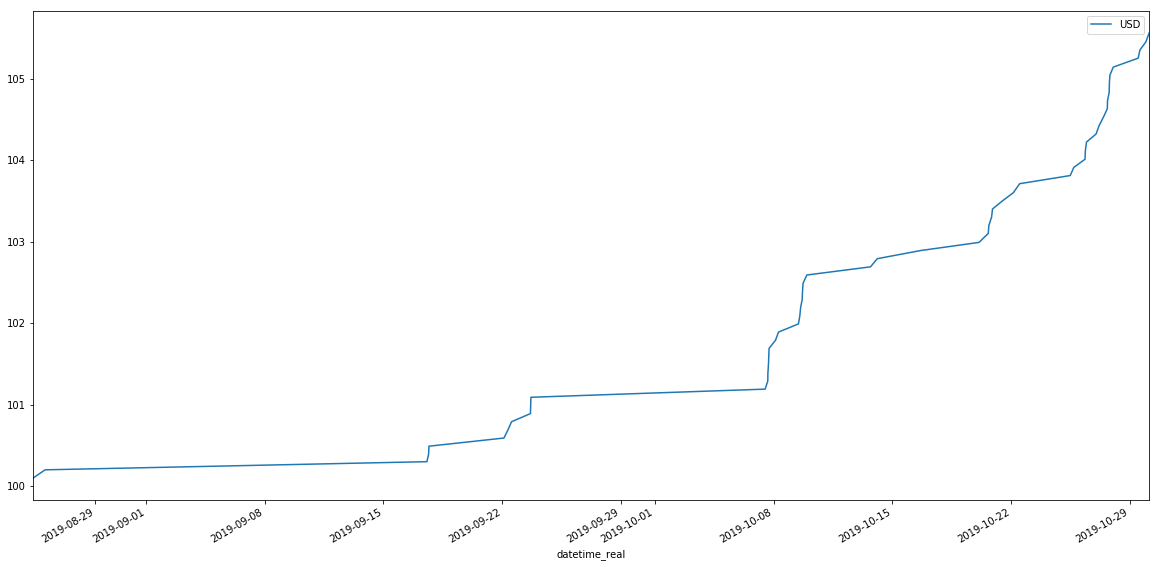

In [148]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['USD']].plot(figsize = (20,10))

## Final result visualisation

In [170]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'black' if x == 'stop_loss_hit' else 'blue' if x == 'time_stop' else 'g')
#     transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'o' if x == 'time_stop' else x)
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


#     tran_y_low = ploting_breakdown['low']
#     tran_y_high = ploting_breakdown['high']
    tran_y_close = ploting_breakdown['close_price']

#     tran_y_ra = ploting_breakdown['20min_RA_on_Close']

    tran_x = ploting_breakdown['timestamp_UTC']


#     plt.plot(tran_x, tran_y_low)
#     plt.plot(tran_x, tran_y_high)
    plt.plot(tran_x, tran_y_close)

#     plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['close_price'].min() * 0.95
    graph_max = ploting_breakdown['close_price'].max() * 1.05

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['timestamp_UTC'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['timestamp_UTC'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

        plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
        plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


#     for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
#     #     print(value['Increase_0.5_percent'])
#     #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
#         plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')

    
    for ind, value in ploting_breakdown[ploting_breakdown['Buy_from_decision_tree']].iterrows():
    #     print(value['Increase_0.5_percent'])
    #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
        plt.vlines(value['timestamp_UTC'], 0, 1, alpha = 0.2, color = 'grey',linestyle = 'dashed')

                                        

    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['timestamp_UTC'].min(), ploting_breakdown['timestamp_UTC'].max())
    plt.legend()

In [154]:
XRP_for_testing_drop_na.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003,True
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004,True
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003,True
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003,False
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003,False


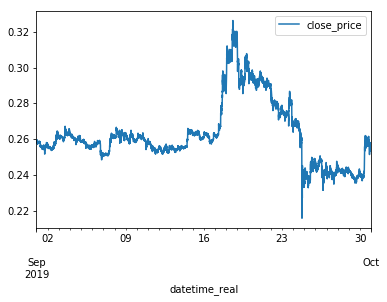

In [156]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-01 00:00:00') & 
                        (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-01 00:00:00')][['close_price','datetime_real']].set_index('datetime_real').plot()

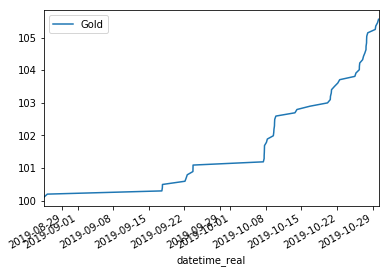

In [157]:
transation_log[(transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

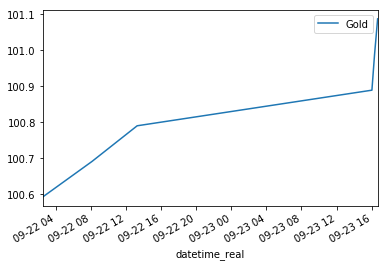

In [158]:
transation_log[(transation_log['datetime_real'] >= '2019-09-18 12:00:00') & 
                (transation_log['datetime_real'] <= '2019-10-01 00:00:00') & 
               (transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

## Deeper look

In [159]:
transation_log[(transation_log['datetime_real'] >= '2019-09-17 12:00:00') & 
                                      (transation_log['datetime_real'] <= '2019-09-20 00:00:00')] 

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD
1.568723e+09,100.295497,0.0000,sell,0.274783,2019-09-17 13:29:00,100.30
1.568723e+09,0.000000,360.8246,brought,0.277406,2019-09-17 13:31:00,0.00
1.568732e+09,100.394189,0.0000,sell,0.278793,2019-09-17 15:52:00,100.39
1.568733e+09,0.000000,359.7345,brought,0.278520,2019-09-17 16:05:00,0.00
1.568734e+09,100.492979,0.0000,sell,0.279913,2019-09-17 16:25:00,100.49


In [160]:
transation_log

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD
1.566695e+09,0.000000,367.7820,brought,0.271356,2019-08-25 01:56:00,0.00
1.566718e+09,100.098402,0.0000,sell,0.272713,2019-08-25 08:25:00,100.10
1.566743e+09,0.000000,365.6901,brought,0.273177,2019-08-25 15:26:00,0.00
1.566779e+09,100.196901,0.0000,sell,0.274543,2019-08-26 01:16:00,100.20
1.566792e+09,0.000000,365.7302,brought,0.273416,2019-08-26 04:55:00,0.00
1.568723e+09,100.295497,0.0000,sell,0.274783,2019-09-17 13:29:00,100.30
1.568723e+09,0.000000,360.8246,brought,0.277406,2019-09-17 13:31:00,0.00
1.568732e+09,100.394189,0.0000,sell,0.278793,2019-09-17 15:52:00,100.39
1.568733e+09,0.000000,359.7345,brought,0.278520,2019-09-17 16:05:00,0.00
1.568734e+09,100.492979,0.0000,sell,0.279913,2019-09-17 16:25:00,100.49


In [161]:
XRP_for_testing_drop_na.tail()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
113334,2019-11-01 15:54:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,120000.0,1.572624e+09,...,0.000103,-0.000148,-0.000040,-0.000044,-0.000010,-0.000059,-0.000034,-0.000021,-0.000005,False
113335,2019-11-01 15:55:00,1572623700000,0.29083,0.29173,0.29173,0.29083,1570.393827,1.572624e+12,60000.0,1.572624e+09,...,0.000265,-0.000068,-0.000016,-0.000031,-0.000001,-0.000056,-0.000030,-0.000017,-0.000005,False
113336,2019-11-01 15:56:00,1572623760000,0.29161,0.29150,0.29161,0.29120,4022.034331,1.572624e+12,60000.0,1.572624e+09,...,0.000162,-0.000087,-0.000019,-0.000035,-0.000002,-0.000059,-0.000031,-0.000019,-0.000006,False
113337,2019-11-01 15:57:00,1572623820000,0.29180,0.29154,0.29207,0.29154,6854.915950,1.572624e+12,60000.0,1.572624e+09,...,0.000163,-0.000072,-0.000018,-0.000034,-0.000007,-0.000059,-0.000030,-0.000018,-0.000006,False
113338,2019-11-01 15:58:00,1572623880000,0.29139,0.29030,0.29151,0.29030,8296.541362,1.572624e+12,60000.0,1.572624e+09,...,-0.000078,-0.000187,-0.000052,-0.000057,-0.000027,-0.000064,-0.000034,-0.000022,-0.000007,False


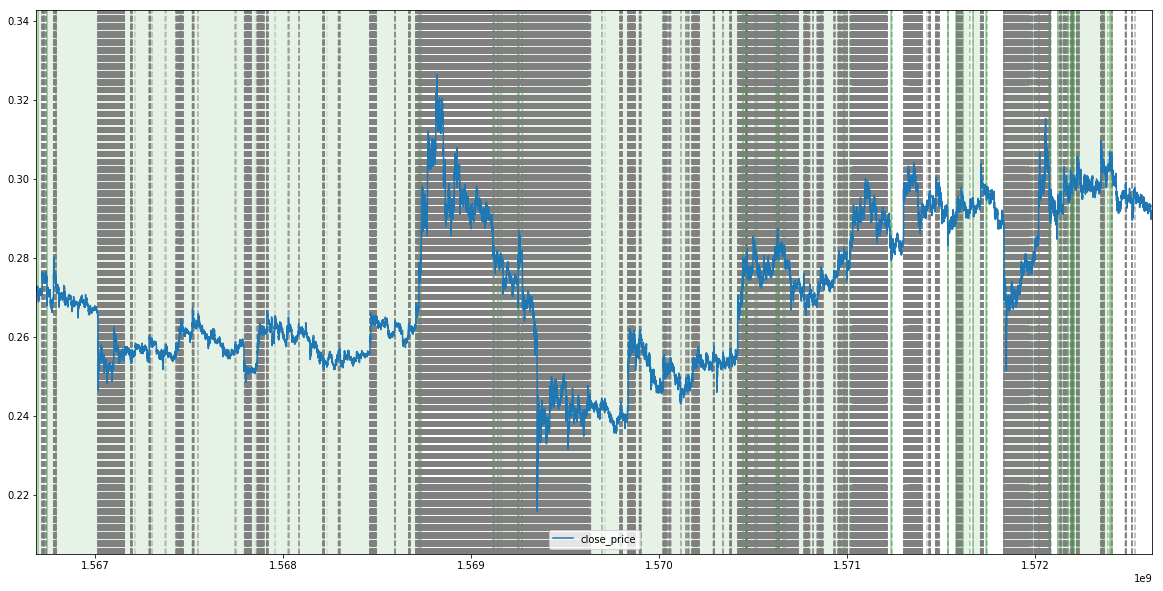

In [171]:
plotting_view(XRP_for_testing_drop_na
              , transation_log)

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')]['close_price'].max()

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')]['close_price'].min()

In [ ]:
-(0.25192 - 0.25421)/0.25192

In [ ]:
## increase in 0.8% in 1 hour

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')].set_index('datetime_real')[['close_price']].plot(figsize =(30,20))

In [ ]:
XRP_for_testing_drop_na.set_index('datetime_real')[['close_price']].plot(figsize =(30,20))

## Saving model

In [ ]:
import pickle

In [ ]:
pkl_filename = "decision_tree_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(buy_in_decision_classifier, file)

In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
import sqlite3

In [ ]:
conn  = sqlite3.connect('D:\\Database\\XRP_Bitfinex.db')

In [ ]:
c = conn.cursor()

In [ ]:
c.execute("Select * from XRP_USD_Pair")

In [ ]:
final_test  = c.fetchall()

In [ ]:
final_test_df = pd.DataFrame(final_test)

In [ ]:
final_test_df.columns = ['Pair',
'Time',
'BID', 
'BID_SIZE', 
'ASK', 
'ASK_SIZE', 
'DAILY_CHANGE', 
'DAILY_CHANGE_RELATIVE', 
'LAST_PRICE', 
'VOLUME', 
'HIGH', 
'LOW']

In [ ]:
final_test_df['LAST_PRICE'] = pd.to_numeric(final_test_df['LAST_PRICE'])

In [ ]:
final_test_df

In [ ]:
table_5min = XRP_Data[(XRP_Data['datetime_real'] >= '2019-11-29 20:06:59')  & (XRP_Data['datetime_real'] <= '2019-11-29 22:16:20')][['datetime_real','close']].set_index('datetime_real')

In [ ]:
table_30s = final_test_df[['Time','LAST_PRICE']].set_index('Time')

In [ ]:
table_5min.head()

In [ ]:
concating = pd.concat([table_5min,table_30s ]).reset_index()

In [ ]:
concating = concating.sort_values(by = 'index')

In [ ]:
concating

In [ ]:
half_min_price = concating['LAST_PRICE']
five_min_price = concating['close']
timing = concating['index']

In [ ]:
plt.figure(figsize= (20,10))
plt.plot(timing,half_min_price )

plt.scatter(timing,five_min_price )
plt.show()

#### Catch "step-downs" and "sharp-drops"

In [ ]:
mark:
    
# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
    
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 10:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 20:00:00')]
                        

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

In [ ]:
(0.287198 - 0.273536)/0.287198

In [ ]:
plt.figure(figsize= (20,10))

# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]

for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

tran_x = for_plotting_visual['datetime_real']
# tran_y_close = for_plotting_visual['close']


tran_x_2 = for_plotting_visual['datetime_real']
tran_y_2_close = for_plotting_visual['close']


plt.plot(tran_x_2, tran_y_2_close)
# plt.plot(tran_x, tran_y_close)



#### 

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]


# Draft Paper

### Static trading

In [ ]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.02
sell_limit = 0.005

trading_data = XRP_for_testing_drop_na
while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit ) and (df['20min_RA_on_Close'] != df['2H_RA_on_Close']): 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [ ]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [ ]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['Gold']].plot(figsize = (20,10))

In [ ]:
transation_log

# identify sharp drop bounce back

In [ ]:
XRP_for_testing_drop_na.tail(1000).set_index('date')[['close']].plot(figsize = (20,10))